let's use this outline as a tool to track the project as we work through the analysis. 

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from pathlib import Path

# from google.colab import drive

import os

In [2]:
# drive.mount('/content/gdrive')
# wine_df = pd.read_csv('gdrive/My Drive/resources/winedata.csv')
# # wine_df = pd.read_csv('gdrive/My Drive/winedata.csv')

In [3]:
winedata_df = pd.read_csv(os.path.join("resources","winedata.csv"))
winedata_df.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


I. Determine the big picture:

II. Get the Data:

In [17]:
winedata_df = pd.read_csv(os.path.join("resources","winedata.csv"))
# winedata_df.head()

print(winedata_df)

     type  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
173     3    13.71        5.65  2.45               20.5         95   
174     3    13.40        3.91  2.48               23.0        102   
175     3    13.27        4.28  2.26               20.0        120   
176     3    13.17        2.59  2.37               20.0        120   
177     3    14.13        4.10  2.74               24.5         96   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1            

In [5]:
# drop type column - this is what we are trying to discover
wine_cols=winedata_df.drop(columns=['type'])

In [6]:
# wine_cols.insert(0, 'class', 'class'=='0')
# print(wine_cols)

In [7]:
# print(wine_cols)

III. Explore and Visualize Data for Preliminary Analysis:

In [6]:
wine_df = wine_cols

In [10]:
# wine_df=winedata_df

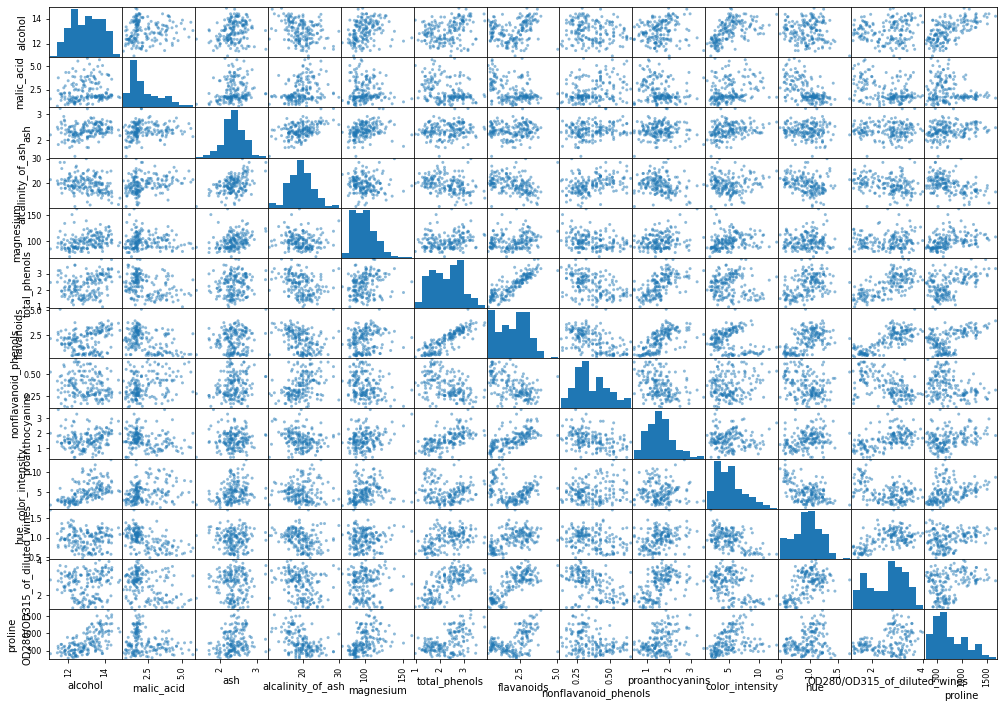

In [7]:
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
# attributes =wine_df["catergories", "alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"])
pd.plotting.scatter_matrix(wine_df, figsize=(17,12))
plt.show()

IV. Prepare Data for Machine Learning:

In [8]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# # y = winedata_df["type"]
# y = winedata_df["alcohol"]
# # y = winedata_df["malic_acid"]
# y = winedata_df["ash"]
# y = winedata_df["alcaninity_of_ash"]
# y = winedata_df["magnesium"]
# y = winedata_df["total_phenols"]
# y = winedata_df["flavanoids"]
# y = winedata_df["proanthocyanins"]
# y = winedata_df["color_intensity"]
# y = winedata_df["hue"]
# y = winedata_df["OD280/od315_of_diluted_wines"]
# y = winedata_df["proline"]

# print("Shape", X.shape, y.shape)

Shape (178, 13) (178,)


In [22]:
X = winedata_df[["malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
            "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
y = winedata_df["alcohol"]
# https://www.statology.org/valueerror-unknown-label-type-continuous/

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

print("Shape", X.shape, y.shape)

Shape (178, 12) (178,)


In [13]:
X = winedata_df[["alcohol", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
            "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
y = winedata_df["malic_acid"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["alcaninity_of_ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["magnesium"]


In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["total_phenols"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["flavanoids"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["proanthocyanins"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["color_intensity"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["hue"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue","proline"]]
# y = winedata_df["OD280/od315_of_diluted_wines"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines"]]
# y = winedata_df["proline"]

V. Select Model and Train It

In [23]:
from sklearn.model_selection import train_test_split
# https://www.statology.org/valueerror-unknown-label-type-continuous/
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state=30)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [25]:
classifier.fit(X_train, y_train)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

Training Data Score: 0.08270676691729323


In [27]:
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

K-Nearest Neighbor Analysis

In [28]:
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.044
k: 3, Train/Test Score: 0.353/0.022
k: 5, Train/Test Score: 0.218/0.000
k: 7, Train/Test Score: 0.128/0.000
k: 9, Train/Test Score: 0.105/0.000
k: 11, Train/Test Score: 0.083/0.000
k: 13, Train/Test Score: 0.075/0.000
k: 15, Train/Test Score: 0.075/0.022
k: 17, Train/Test Score: 0.068/0.022
k: 19, Train/Test Score: 0.060/0.022


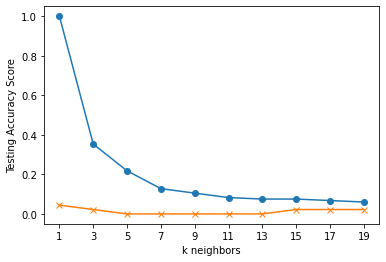

In [30]:
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker = 'x')

loc, labels = plt.xticks()

plt.xticks(np.arange(1, max(loc), step=2))

plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc:%.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc:0.000


In [35]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [36]:
confusion_matrix(y_true, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       4.0
          21       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          30       0.00    

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/pyth

Random Forest Classifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
clf = RandomForestClassifier(random_state=1, n_estimators=5000). fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

ValueError: Unknown label type: 'continuous'

In [27]:
feature_importances = clf.feature_importances_

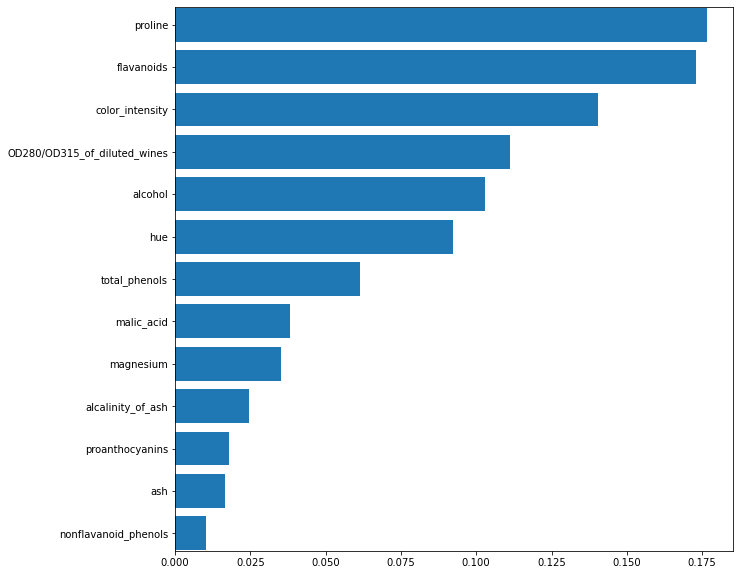

In [28]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [30]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled= scaler.transform(X_selected_test)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [31]:
clf = LogisticRegression(). fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [32]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9777777777777777


VI. Fine Tune Model

VII.Present Solution

VIII. Launch System